In [12]:
import os
import shutil

def get_next_index(target_folder):
    """Finds the next available index for renaming images."""
    existing_files = os.listdir(target_folder)
    indices = []
    for filename in existing_files:
        if filename.startswith("img_") and filename.endswith(".png"):
            try:
                index = int(filename.split("_")[1].split(".")[0])
                indices.append(index)
            except ValueError:
                continue
    return max(indices, default=0) + 1

def rename_and_merge(src_root, dest_root):
    """Renames and merges images and masks from src_root to dest_root."""
    for category in ["Normal", "Benign", "Malignant"]:
        for subfolder in ["Images", "Masks"]:
            src_folder = os.path.join(src_root, category, subfolder)
            dest_folder = os.path.join(dest_root, category, subfolder)
            
            if not os.path.exists(dest_folder):
                os.makedirs(dest_folder)
            
            next_index = get_next_index(dest_folder)
            
            for filename in sorted(os.listdir(src_folder)):
                if filename.endswith(".png"):
                    new_filename = f"img_{next_index:03d}.png"
                    src_path = os.path.join(src_folder, filename)
                    dest_path = os.path.join(dest_folder, new_filename)
                    shutil.copy2(src_path, dest_path)
                    next_index += 1

if __name__ == "__main__":
    dataset1 = r"C:\Users\jeeva\OneDrive\Desktop\new_data\single_mask_dataset1"
    dataset2 = r"C:\Users\jeeva\OneDrive\Desktop\new_data\dataset2"
    output_directory = r"C:\Users\jeeva\OneDrive\Desktop\new_data\merged"  # Specify the output directory
    merged_dataset = os.path.join(output_directory, "breast_cancer_dataset")
    
    # Ensure the output directory exists
    os.makedirs(output_directory, exist_ok=True)
    
    # First, copy dataset1 as the base
    shutil.copytree(dataset1, merged_dataset, dirs_exist_ok=True)
    
    # Merge dataset2 into dataset1
    rename_and_merge(dataset2, merged_dataset)
    
    print("Datasets merged successfully!")


Datasets merged successfully!


In [13]:
import os
import shutil

def rename_and_copy_images(input_root, output_root):
    categories = ["Normal", "Benign", "Malignant"]
    
    for category in categories:
        for subdir in ["Images", "Masks"]:
            input_dir = os.path.join(input_root, category, subdir)
            output_dir = os.path.join(output_root, category, subdir)
            os.makedirs(output_dir, exist_ok=True)
            
            files = sorted(os.listdir(input_dir))  # Sorting ensures consistency
            
            for idx, filename in enumerate(files, start=1):
                ext = os.path.splitext(filename)[-1]
                
                if subdir == "Images":
                    new_name = f"{category.lower()} ({idx}){ext}"
                else:  # For Masks
                    new_name = f"{category.lower()} ({idx})_mask{ext}"
                
                src_path = os.path.join(input_dir, filename)
                dest_path = os.path.join(output_dir, new_name)
                
                shutil.copy(src_path, dest_path)
                print(f"Renamed: {src_path} -> {dest_path}")

if __name__ == "__main__":
    input_root = r"C:\Users\jeeva\OneDrive\Desktop\new_data\merged\breast_cancer_dataset"  # Change this to your actual dataset path
    output_root = r"C:\Users\jeeva\OneDrive\Desktop\new_data\renamed_dataset"  # Change this to desired output path
    rename_and_copy_images(input_root, output_root)


Renamed: C:\Users\jeeva\OneDrive\Desktop\new_data\merged\breast_cancer_dataset\Normal\Images\img_001.png -> C:\Users\jeeva\OneDrive\Desktop\new_data\renamed_dataset\Normal\Images\normal (1).png
Renamed: C:\Users\jeeva\OneDrive\Desktop\new_data\merged\breast_cancer_dataset\Normal\Images\img_002.png -> C:\Users\jeeva\OneDrive\Desktop\new_data\renamed_dataset\Normal\Images\normal (2).png
Renamed: C:\Users\jeeva\OneDrive\Desktop\new_data\merged\breast_cancer_dataset\Normal\Images\img_003.png -> C:\Users\jeeva\OneDrive\Desktop\new_data\renamed_dataset\Normal\Images\normal (3).png
Renamed: C:\Users\jeeva\OneDrive\Desktop\new_data\merged\breast_cancer_dataset\Normal\Images\img_004.png -> C:\Users\jeeva\OneDrive\Desktop\new_data\renamed_dataset\Normal\Images\normal (4).png
Renamed: C:\Users\jeeva\OneDrive\Desktop\new_data\merged\breast_cancer_dataset\Normal\Images\img_005.png -> C:\Users\jeeva\OneDrive\Desktop\new_data\renamed_dataset\Normal\Images\normal (5).png
Renamed: C:\Users\jeeva\OneDri

1. Check for Matching Filenames

In [14]:
import os

def verify_alignment(root_dir):
    categories = ["Normal", "Benign", "Malignant"]
    
    for category in categories:
        img_dir = os.path.join(root_dir, category, "Images")
        mask_dir = os.path.join(root_dir, category, "Masks")
        
        img_files = sorted([f for f in os.listdir(img_dir) if f.endswith(('.png', '.jpg'))])
        mask_files = sorted([f for f in os.listdir(mask_dir) if f.endswith(('.png', '.jpg'))])

        img_names = [os.path.splitext(f)[0] for f in img_files]
        mask_names = [os.path.splitext(f)[0].replace("_mask", "") for f in mask_files]
        
        if img_names == mask_names:
            print(f"{category}: ✅ Images and masks are correctly aligned.")
        else:
            print(f"{category}: ❌ Misalignment detected!")
            mismatched = set(img_names) ^ set(mask_names)
            print(f"  Mismatched files: {mismatched}")

if __name__ == "__main__":
    root_dir = r"C:\Users\jeeva\OneDrive\Desktop\new_data\renamed_dataset"  # Change to your renamed dataset path
    verify_alignment(root_dir)


Normal: ✅ Images and masks are correctly aligned.
Benign: ✅ Images and masks are correctly aligned.
Malignant: ✅ Images and masks are correctly aligned.


2. Visual Verification

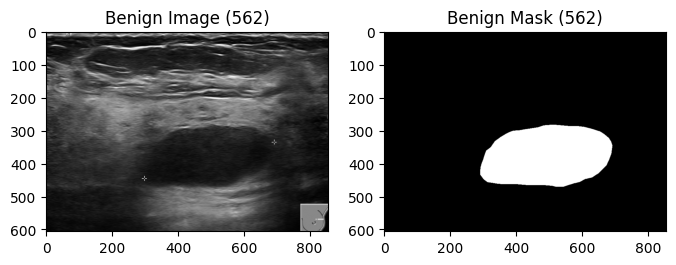

In [20]:
import os
import cv2
import matplotlib.pyplot as plt

def visualize_sample(root_dir, category, idx):
    img_path = os.path.join(root_dir, category, "Images", f"{category.lower()} ({idx}).png")
    mask_path = os.path.join(root_dir, category, "Masks", f"{category.lower()} ({idx})_mask.png")

    if os.path.exists(img_path) and os.path.exists(mask_path):
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"{category} Image ({idx})")

        plt.subplot(1, 2, 2)
        plt.imshow(mask, cmap='gray')
        plt.title(f"{category} Mask ({idx})")

        plt.show()
    else:
        print(f"❌ Missing files for {category} ({idx})")

if __name__ == "__main__":
    
    visualize_sample(root_dir, "Benign", 562)  # Change category and index as needed


3. Check for Missing or Extra Files

In [17]:
def count_files(root_dir):
    categories = ["Normal", "Benign", "Malignant"]
    
    for category in categories:
        img_dir = os.path.join(root_dir, category, "Images")
        mask_dir = os.path.join(root_dir, category, "Masks")

        num_imgs = len(os.listdir(img_dir))
        num_masks = len(os.listdir(mask_dir))

        print(f"{category}: {num_imgs} images, {num_masks} masks")
        if num_imgs != num_masks:
            print(f"❌ Warning: Mismatch detected in {category}!")

if __name__ == "__main__":
    count_files(root_dir)


Normal: 552 images, 552 masks
Benign: 611 images, 611 masks
Malignant: 300 images, 300 masks
